# Loading Libraries

In [1]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df = pd.read_csv('study_case.csv')
df

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
0,69522307739,with-credit-card,2019-12-20,2019-12-21,NaN,2020-01-11,patient-show,2020-01-13
1,931819353745,with-credit-card,2019-12-23,NaN,NaN,NaN,NaN,NaN
2,979634255142,with-credit-card,2019-12-19,2019-12-19,NaN,2020-01-05,patient-no-show,NaN
3,534016431925,with-credit-card,2019-12-22,NaN,NaN,NaN,NaN,NaN
4,934071204695,no-credit-card,2019-12-23,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
245,774314191241,with-credit-card,2019-12-17,2019-12-17,NaN,2019-12-18,patient-show,NaN
246,811952273739,with-credit-card,2019-12-22,NaN,NaN,NaN,patient-show,2020-01-21
247,370546689849,no-credit-card,2019-12-26,2019-12-26,NaN,2020-02-19,patient-show,2020-02-20
248,30550284109,with-credit-card,2019-12-22,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   patient_id              250 non-null    int64 
 1   experiment_group        250 non-null    object
 2   patient_created_at      249 non-null    object
 3   first_cx_booked_at      137 non-null    object
 4   first_cx_cancelled_at   16 non-null     object
 5   cx_appointment_at       127 non-null    object
 6   appointment_attendance  129 non-null    object
 7   px_booked_at            15 non-null     object
dtypes: int64(1), object(7)
memory usage: 15.8+ KB


# Checking for duplicates

In [4]:
df.patient_id.nunique()

242

In [5]:
df.shape

(250, 8)

In [6]:
df.duplicated().sum()

8

In [7]:
df[df.duplicated(['patient_id'], keep=False)]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
53,786438886806,no-credit-card,2019-12-23,2019-12-24,NaN,2020-01-02,patient-show,NaN
59,690448637389,no-credit-card,2019-12-16,2019-12-16,NaN,2020-01-18,patient-show,NaN
90,786438886806,no-credit-card,2019-12-23,2019-12-24,NaN,2020-01-02,patient-show,NaN
94,370546689849,no-credit-card,2019-12-26,2019-12-26,NaN,2020-02-19,patient-show,2020-02-20
128,786438886806,no-credit-card,2019-12-23,2019-12-24,NaN,2020-01-02,patient-show,NaN
155,754288149560,no-credit-card,2019-12-29,2019-12-29,NaN,2020-01-11,patient-show,2020-01-13
163,370546689849,no-credit-card,2019-12-26,2019-12-26,NaN,2020-02-19,patient-show,2020-02-20
175,690448637389,no-credit-card,2019-12-16,2019-12-16,NaN,2020-01-18,patient-show,NaN
211,754288149560,no-credit-card,2019-12-29,2019-12-29,NaN,2020-01-11,patient-show,2020-01-13
214,690448637389,no-credit-card,2019-12-16,2019-12-16,NaN,2020-01-18,patient-show,NaN


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

**There are no more duplicates**

# Missing values

In [10]:
df.isnull().sum()

patient_id                  0
experiment_group            0
patient_created_at          1
first_cx_booked_at        113
first_cx_cancelled_at     226
cx_appointment_at         123
appointment_attendance    121
px_booked_at              230
dtype: int64

**`patient_created_at` column has one missing value. I will zoom into this record to see if the patient had any further points of contact.**

In [11]:
df[df.patient_created_at.isna()]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
23,391914615807,no-credit-card,NaN,2019-12-16,NaN,2020-01-18,patient-show,NaN


**The patient have attended an appointment so the `patient_created_at` variable should not be empty. There may be a valid reason why this record is missing but for the purpose of this analysis and to ease visualisation I will assume that if the patient had any interaction with the business they should have `patient_created_at` field populated. I will fill it with the `first_cx_booked_at` date as this is the first point of contact we know of.**

In [12]:
df["patient_created_at"] = df["patient_created_at"].fillna(df["first_cx_booked_at"])

In [13]:
df[df.patient_id == 391914615807]  #printing the row again to check the result

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
23,391914615807,no-credit-card,2019-12-16,2019-12-16,NaN,2020-01-18,patient-show,NaN


In [14]:
df.isnull().sum()

patient_id                  0
experiment_group            0
patient_created_at          0
first_cx_booked_at        113
first_cx_cancelled_at     226
cx_appointment_at         123
appointment_attendance    121
px_booked_at              230
dtype: int64

**Let's visualise the missing values.**

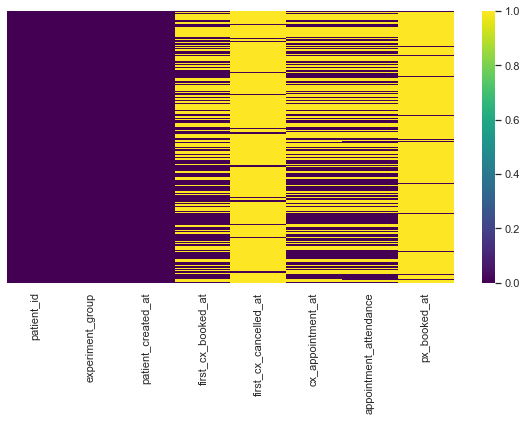

In [15]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

**The `patient_created_at` column for customer id `391914615807` has been filled and there are no missing values in that column.**

**I will leave the remaining missing values for now.**

# Converting the columns containing dates to datetime

**When I tried to convert the `patient_created_at` into datetime I received an error message stating that some dates were in the YYYY-DD-MM format instead of YYYY-MM-DD so I started with locating those and coverting them to the correct format.**

In [16]:
df[~df["patient_created_at"].str.contains("2019-12")]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
50,436662928129,with-credit-card,2019-19-12,2019-19-12,NaN,2020-02-01,patient-show,NaN
77,33942714700,with-credit-card,2019-16-12,2019-16-12,NaN,2020-08-01,patient-show,NaN
135,298097861609,with-credit-card,2019-28-12,2019-28-12,NaN,2020-04-01,patient-show,NaN
136,297535192606,with-credit-card,2019-23-12,2019-23-12,NaN,2020-12-01,patient-no-show,NaN
226,57118389641,no-credit-card,2019-21-12,2019-21-12,NaN,2020-11-01,patient-no-show,NaN


In [17]:
import fnmatch
fnmatch.filter(df.patient_created_at, '2019-*-12')  #another way of checking which dates have 12 in the last position

['2019-19-12', '2019-16-12', '2019-28-12', '2019-23-12', '2019-21-12']

**The above are the only ones so I will create a dictionary to then replace the incorect format into the right format.**

In [18]:
date_map = {'2019-19-12' : '2019-12-19',
            '2019-16-12' : '2019-12-16',
            '2019-28-12' : '2019-12-28',
            '2019-23-12' : '2019-12-23',
            '2019-21-12' : '2019-12-21'}
date_map

{'2019-19-12': '2019-12-19',
 '2019-16-12': '2019-12-16',
 '2019-28-12': '2019-12-28',
 '2019-23-12': '2019-12-23',
 '2019-21-12': '2019-12-21'}

In [19]:
df["patient_created_at"] = df["patient_created_at"].replace(date_map, regex=True)  #replacing values using date_map dictionary

In [20]:
fnmatch.filter(df.patient_created_at, '2019-*-12')  #repeating the search done previously to see if the wrong formats are gone

[]

**There are no more dates with incorrect format so I can convert the column type to "datetime".**

In [21]:
df["patient_created_at"] = pd.to_datetime(df["patient_created_at"])  #converting object values o datetime

**I will try to do the same for the other "date" columns.**

**Converting `first_cx_booked_at` column:**

In [22]:
df["first_cx_booked_at"] = df["first_cx_booked_at"].replace(date_map, regex=True)  #replacing values using date_map dictionary
df["first_cx_booked_at"] = pd.to_datetime(df["first_cx_booked_at"])  #converting object values o datetime

**Converting `first_cx_cancelled_at` column:**

In [23]:
df["first_cx_cancelled_at"].unique()  #checking all unique values to see if there are some that may be in incorrect format

array([nan, '2019-12-21', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-18', '2019-12-28', '2019-12-27', '2019-12-22'],
      dtype=object)

In [24]:
df["first_cx_cancelled_at"] = pd.to_datetime(df["first_cx_cancelled_at"])  #converting object values o datetime

**Converting `cx_appointment_at` column:**

In [25]:
df['cx_appointment_at'].unique()

array(['2020-01-11', nan, '2020-01-05', '2020-02-13', '2020-02-12',
       '2020-01-15', '2020-01-18', '2019-12-23', '2019-12-30',
       '2020-02-02', '2020-01-27', '2020-03-14', '2020-01-20',
       '2020-01-01', '2020-02-16', '2020-02-01', '2020-01-02',
       '2020-01-09', '2020-02-09', '2019-12-29', '2020-01-30',
       '2020-01-19', '2020-01-29', '2020-08-01', '2020-01-25',
       '2020-01-04', '2020-01-07', '2020-02-19', '2020-01-08',
       '2019-12-16', '2020-01-16', '2020-04-01', '2020-12-01',
       '2020-01-28', '2020-01-13', '2020-01-21', '2019-12-19',
       '2019-12-31', '2019-12-28', '2020-03-06', '2019-12-25',
       '2020-01-14', '2020-01-26', '2020-03-17', '2020-01-06',
       '2020-03-09', '2019-12-21', '2020-11-01', '2020-02-18',
       '2020-03-02', '2019-12-18'], dtype=object)

**The `cx_appointment_at` column is a little bit more tricky to deal with because all dates seem probable (there is no value with the middle value more than 12) but for patients who had dates in incorrect format in other column (data showing earlier in this chapter) it does not seem probable that their appointments booked in Dec 2019 would actually take place 8, 11 or 12 months later. So I decided that the patients who had incorrect format in all the other columns would also have incorrect format in this column.**

**First, I will print all the values with the dates that I suspect to be incorrect:**

In [26]:
df.loc[df['cx_appointment_at'].isin(['2020-02-01', '2020-08-01', '2020-04-01', '2020-12-01', '2020-11-01'])]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
50,436662928129,with-credit-card,2019-12-19,2019-12-19,NaT,2020-02-01,patient-show,NaN
77,33942714700,with-credit-card,2019-12-16,2019-12-16,NaT,2020-08-01,patient-show,NaN
135,298097861609,with-credit-card,2019-12-28,2019-12-28,NaT,2020-04-01,patient-show,NaN
136,297535192606,with-credit-card,2019-12-23,2019-12-23,NaT,2020-12-01,patient-no-show,NaN
226,57118389641,no-credit-card,2019-12-21,2019-12-21,NaT,2020-11-01,patient-no-show,NaN


**Yes, those are the same rows so each of those dates apears only oce in the dataset. I can go ahead and change them to the correct format.**

In [27]:
date_map_ = {'2020-02-01' : '2020-01-02',
             '2020-08-01' : '2020-01-08',
             '2020-04-01' : '2020-01-04',
             '2020-12-01' : '2020-01-12',
             '2020-11-01' : '2020-01-11'}

In [28]:
df["cx_appointment_at"] = df["cx_appointment_at"].replace(date_map_, regex=True)  #replacing values using date_map dictionary
df["cx_appointment_at"] = pd.to_datetime(df["cx_appointment_at"])  #converting object values o datetime

**Converting `px_booked_att` column:**

In [29]:
df['px_booked_at'].unique()

array(['2020-01-13', nan, '2020-02-18', '2020-01-06', '2019-12-24',
       '2020-02-20', '2020-01-14', '2019-12-30', '2020-01-07',
       '2019-12-22', '2020-01-21'], dtype=object)

**There are no worng formats there. I will convert them as they are.**

In [30]:
df["px_booked_at"] = pd.to_datetime(df["px_booked_at"])  #converting object values o datetime

In [31]:
df.info()  #to check the type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 249
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   patient_id              242 non-null    int64         
 1   experiment_group        242 non-null    object        
 2   patient_created_at      242 non-null    datetime64[ns]
 3   first_cx_booked_at      129 non-null    datetime64[ns]
 4   first_cx_cancelled_at   16 non-null     datetime64[ns]
 5   cx_appointment_at       119 non-null    datetime64[ns]
 6   appointment_attendance  121 non-null    object        
 7   px_booked_at            12 non-null     datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(2)
memory usage: 17.0+ KB


# Adding conversion column

**Creating a column called 'converted' where all booked procedures will be 1 and all the null values will be 0**

In [32]:
df['px_booked_at'].unique()

array(['2020-01-13T00:00:00.000000000',                           'NaT',
       '2020-02-18T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2019-12-24T00:00:00.000000000', '2020-02-20T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [33]:
df['converted'] = df['px_booked_at'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [34]:
df.head()

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
0,69522307739,with-credit-card,2019-12-20,2019-12-21,NaT,2020-01-11,patient-show,2020-01-13,1
1,931819353745,with-credit-card,2019-12-23,NaT,NaT,NaT,NaN,NaT,0
2,979634255142,with-credit-card,2019-12-19,2019-12-19,NaT,2020-01-05,patient-no-show,NaT,0
3,534016431925,with-credit-card,2019-12-22,NaT,NaT,NaT,NaN,NaT,0
4,934071204695,no-credit-card,2019-12-23,NaT,NaT,NaT,NaN,NaT,0


In [35]:
df[~df.px_booked_at.isnull()]  #display all rows where "px_booked_at" is  ot null to see if they have 1 in "converted" col

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
0,69522307739,with-credit-card,2019-12-20,2019-12-21,NaT,2020-01-11,patient-show,2020-01-13,1
31,534789265442,no-credit-card,2019-12-22,2019-12-22,NaT,2020-01-27,patient-show,2020-02-18,1
39,975158146804,no-credit-card,2019-12-18,2019-12-18,NaT,2019-12-23,patient-show,2020-01-06,1
58,667418593631,no-credit-card,2019-12-21,2019-12-15,NaT,2019-12-23,patient-show,2019-12-24,1
94,370546689849,no-credit-card,2019-12-26,2019-12-26,NaT,2020-02-19,patient-show,2020-02-20,1
115,188754803197,with-credit-card,2019-12-22,2019-12-22,NaT,2019-12-23,patient-show,2019-12-24,1
117,460197213462,with-credit-card,2019-12-26,NaT,NaT,NaT,patient-show,2020-01-14,1
155,754288149560,no-credit-card,2019-12-29,2019-12-29,NaT,2020-01-11,patient-show,2020-01-13,1
184,313552299032,no-credit-card,2019-12-15,2019-12-15,NaT,2019-12-25,patient-show,2019-12-30,1
220,582062461609,with-credit-card,2019-12-23,NaT,NaT,2020-01-05,patient-show,2020-01-07,1


# Count of customer journey and more missing values

In [36]:
df.columns

Index(['patient_id', 'experiment_group', 'patient_created_at',
       'first_cx_booked_at', 'first_cx_cancelled_at', 'cx_appointment_at',
       'appointment_attendance', 'px_booked_at', 'converted'],
      dtype='object')

In [37]:
df.groupby(['experiment_group']).count()[['patient_created_at', 'first_cx_booked_at', 'first_cx_cancelled_at', 
                                         'cx_appointment_at', 'appointment_attendance', 'px_booked_at']].reset_index()

,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at
0,no-credit-card,141,84,10,76,76,6
1,with-credit-card,101,45,6,43,45,6


<AxesSubplot:xlabel='experiment_group'>

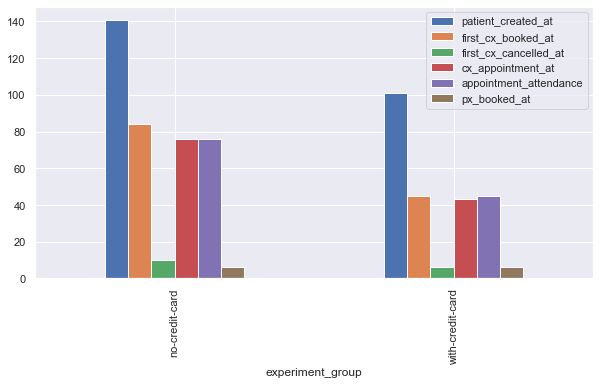

In [38]:
df.groupby(['experiment_group']).count()[['patient_created_at', 'first_cx_booked_at', 'first_cx_cancelled_at', 
                                         'cx_appointment_at', 'appointment_attendance', 'px_booked_at']].plot(kind='bar',figsize=(10,5))

In [39]:
df.groupby(['experiment_group', 'appointment_attendance']).count()[['patient_created_at', 'first_cx_booked_at', 
                                                                    'first_cx_cancelled_at', 'cx_appointment_at', 
                                                                    'px_booked_at']].reset_index()

,experiment_group,appointment_attendance,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,px_booked_at
0,no-credit-card,patient-no-show,7,7,0,7,0
1,no-credit-card,patient-show,69,69,2,69,6
2,with-credit-card,patient-no-show,7,6,1,7,0
3,with-credit-card,patient-show,38,34,0,36,6


**It is very strange that we have more appointments than actual bookings in rows 3 and 4.**

In [40]:
df.loc[(df['appointment_attendance'] == 'patient-show') & (df['cx_appointment_at'].isnull())]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
117,460197213462,with-credit-card,2019-12-26,NaT,NaT,NaT,patient-show,2020-01-14,1
246,811952273739,with-credit-card,2019-12-22,NaT,NaT,NaT,patient-show,2020-01-21,1


In [41]:
df.loc[(df['appointment_attendance'] == 'patient-show') & (df['first_cx_booked_at'].isnull())]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
117,460197213462,with-credit-card,2019-12-26,NaT,NaT,NaT,patient-show,2020-01-14,1
152,507711602026,with-credit-card,2019-12-28,NaT,NaT,2020-02-02,patient-show,NaT,0
220,582062461609,with-credit-card,2019-12-23,NaT,NaT,2020-01-05,patient-show,2020-01-07,1
246,811952273739,with-credit-card,2019-12-22,NaT,NaT,NaT,patient-show,2020-01-21,1


In [42]:
df.loc[(~df['appointment_attendance'].isnull()) & (df['first_cx_booked_at'].isnull())]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
25,974812628843,with-credit-card,2019-12-16,NaT,NaT,2019-12-23,patient-no-show,NaT,0
117,460197213462,with-credit-card,2019-12-26,NaT,NaT,NaT,patient-show,2020-01-14,1
152,507711602026,with-credit-card,2019-12-28,NaT,NaT,2020-02-02,patient-show,NaT,0
220,582062461609,with-credit-card,2019-12-23,NaT,NaT,2020-01-05,patient-show,2020-01-07,1
246,811952273739,with-credit-card,2019-12-22,NaT,NaT,NaT,patient-show,2020-01-21,1


In [43]:
patients = df.loc[(~df['appointment_attendance'].isnull()) & (df['first_cx_booked_at'].isnull())]['patient_id']

**The above records are a little bit problematic because it does not make sense that a patient would have a status in "appointment_attendance" column but would not have the booking date OR neither the booking date nor the appointment date.
Three of those 5 records actually had a procedure so it does not seem right to assume that they didn't have a consultation and that the appointment_attendance info is wrong.**

**In that case, for only those 5 records showing above, I will:**

**-fill the missing date in column "first_cx_booked_at" with the values from column "patient_created_at", and**

**-fill the missing date in column "cx_appointment_at" with the average value from that column.**

In [44]:
df["cx_appointment_at"].mean()  #the average appointment date

Timestamp('2020-01-14 23:11:35.798319360')

In [45]:
for i in patients:
    df.loc[df.patient_id==i, 'first_cx_booked_at'] = df.loc[df.patient_id==i, 'first_cx_booked_at'].fillna(df.loc[df.patient_id==i, 'patient_created_at'])

In [46]:
df.loc[df.patient_id==460197213462, 'cx_appointment_at'] = df.loc[df.patient_id==460197213462, 'cx_appointment_at'].fillna('2020-01-14')

In [47]:
df.loc[df.patient_id==811952273739, 'cx_appointment_at'] = df.loc[df.patient_id==811952273739, 'cx_appointment_at'].fillna('2020-01-14')

In [48]:
df.loc[df.patient_id.isin(patients)]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
25,974812628843,with-credit-card,2019-12-16,2019-12-16,NaT,2019-12-23,patient-no-show,NaT,0
117,460197213462,with-credit-card,2019-12-26,2019-12-26,NaT,2020-01-14,patient-show,2020-01-14,1
152,507711602026,with-credit-card,2019-12-28,2019-12-28,NaT,2020-02-02,patient-show,NaT,0
220,582062461609,with-credit-card,2019-12-23,2019-12-23,NaT,2020-01-05,patient-show,2020-01-07,1
246,811952273739,with-credit-card,2019-12-22,2019-12-22,NaT,2020-01-14,patient-show,2020-01-21,1


In [49]:
df.isnull().sum()

patient_id                  0
experiment_group            0
patient_created_at          0
first_cx_booked_at        108
first_cx_cancelled_at     226
cx_appointment_at         121
appointment_attendance    121
px_booked_at              230
converted                   0
dtype: int64

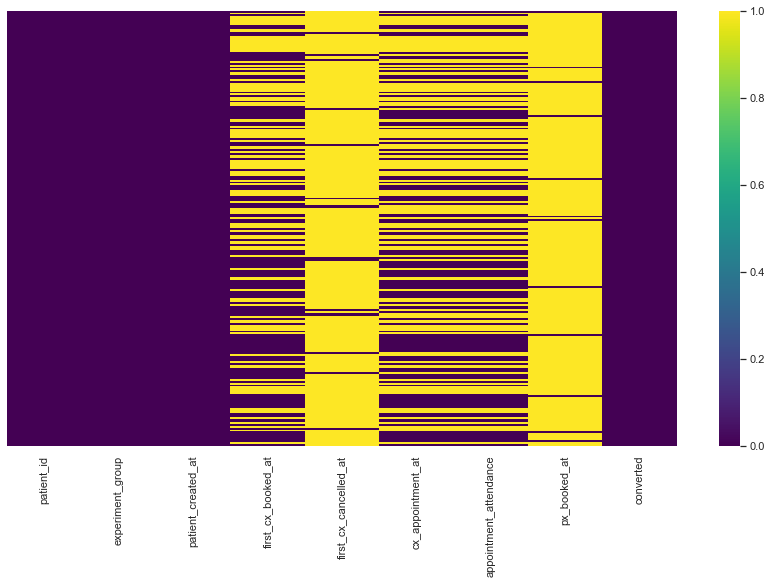

In [50]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

<AxesSubplot:xlabel='experiment_group'>

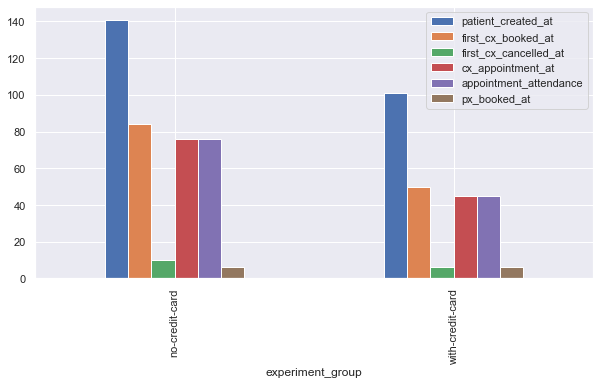

In [51]:
df.groupby(['experiment_group']).count()[['patient_created_at', 'first_cx_booked_at', 'first_cx_cancelled_at', 
                                         'cx_appointment_at', 'appointment_attendance', 'px_booked_at']].plot(kind='bar',figsize=(10,5))

In [52]:
df.loc[(df['appointment_attendance'].isnull()) & (~df['first_cx_booked_at'].isnull())]

,patient_id,experiment_group,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,appointment_attendance,px_booked_at,converted
24,860358654418,no-credit-card,2019-12-23,2019-12-23,2019-12-24,NaT,NaN,NaT,0
27,849159228711,with-credit-card,2019-12-22,2019-12-22,2019-12-24,NaT,NaN,NaT,0
54,187379779592,no-credit-card,2019-12-16,2019-12-16,2019-12-25,NaT,NaN,NaT,0
74,215020880332,no-credit-card,2019-12-25,2019-12-25,2019-12-25,NaT,NaN,NaT,0
109,489687504683,with-credit-card,2019-12-22,2019-12-23,2019-12-26,NaT,NaN,NaT,0
110,997065639838,no-credit-card,2019-12-17,2019-12-17,2019-12-18,NaT,NaN,NaT,0
140,898547104331,no-credit-card,2019-12-24,2019-12-24,2019-12-25,NaT,NaN,NaT,0
169,860268115663,with-credit-card,2019-12-19,2019-12-19,2019-12-21,NaT,NaN,NaT,0
171,663728330829,no-credit-card,2019-12-26,2019-12-26,2019-12-27,NaT,NaN,NaT,0
172,369776702124,with-credit-card,2019-12-18,2019-12-23,2019-12-27,NaT,NaN,NaT,0


# Saving the clean copy of the file.

In [53]:
df.to_csv('study_case_clean.csv')

# Frequency tables & visualisations

In [54]:
df.experiment_group.value_counts()

no-credit-card      141
with-credit-card    101
Name: experiment_group, dtype: int64

<AxesSubplot:>

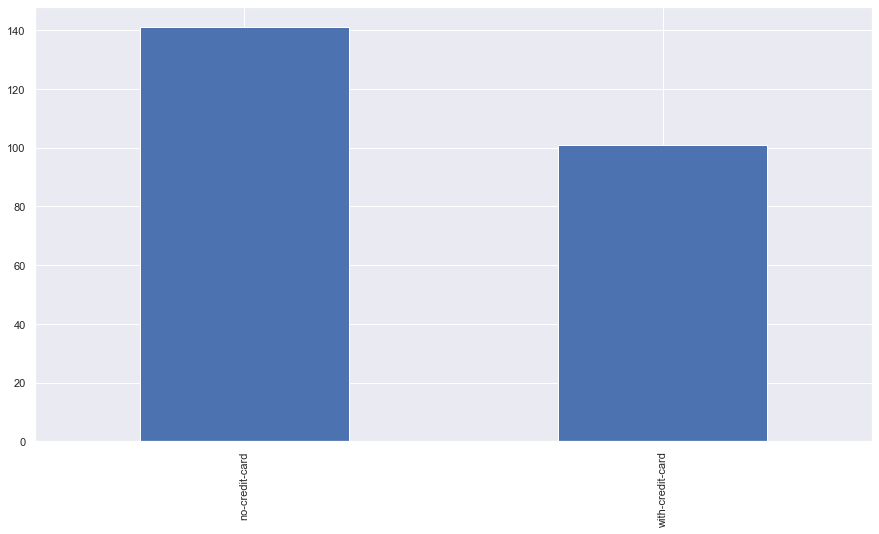

In [55]:
df.experiment_group.value_counts().plot(kind='bar')

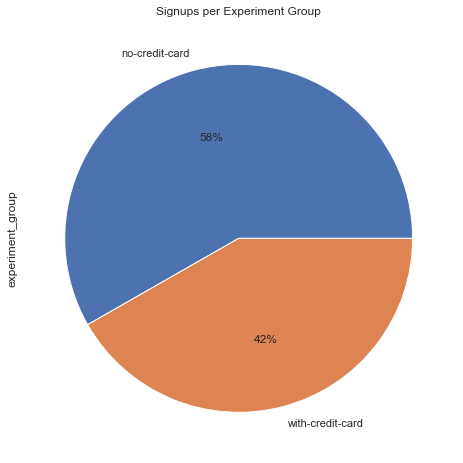

In [56]:
df.experiment_group.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Signups per Experiment Group')
plt.savefig('exp_group.png')

**Patients who were not asked for the credit card details signed up more frequently than those who were asked to provide them OR patiets had a lesser chance of receiving the with-credit -card page. I will check the stistics for patient_created_at per each group to see if the experiment was conducted within the same time period and what was the frequency of singups.**

In [57]:
df.agg(['count', 'min', 'mean', 'median', 'max'])['patient_created_at']

count                               242
min                 2019-12-15 00:00:00
mean      2019-12-21 15:34:12.892561920
median              2019-12-22 00:00:00
max                 2019-12-29 00:00:00
Name: patient_created_at, dtype: object

In [58]:
df.groupby(['experiment_group']).agg(['count', 'min', 'mean', 'median', 'max'])['patient_created_at']

,count,min,mean,median,max
experiment_group,,,,,
no-credit-card,141,2019-12-15,2019-12-21 08:51:03.829787136,2019-12-21,2019-12-29
with-credit-card,101,2019-12-15,2019-12-22 00:57:01.782178304,2019-12-22,2019-12-29


**The minimum and maximum dates are the same for both groups. The first sign up was on 15 Dec 2019 the last was on 29 Dec 2019. The experiment lasted 15 days.**

**The mean and median for each group are similar to each other and similar to the overall mean and median, although the mean and median for the "with-credit-card" group is one day later than the the other group. It is not a big difference but I will check the distribution for more details.**

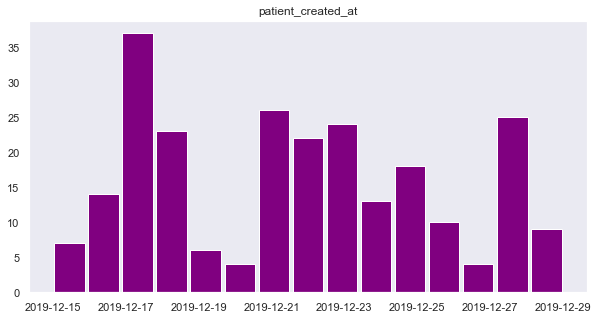

In [59]:
df.hist(column='patient_created_at', figsize=(10,5), bins=15, grid=False, rwidth=.9, color='purple')
plt.savefig('pat_created_all.png')

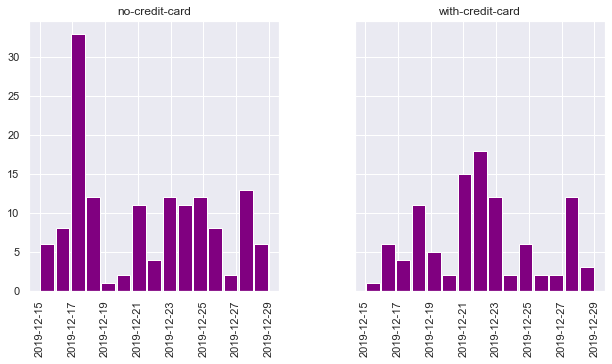

In [60]:
df.hist(column='patient_created_at', by='experiment_group', figsize=(10,5), bins=15, grid=False, rwidth=.9,
        color='purple', sharex=True, sharey=True)
plt.savefig('pat_created_split.png')

**There was a massive increase in sign ups for the "no-credit-card" group on 17 December but there were some sign ups for the other group on that day as well so I cannot really say that the difference was due to one version of the page not working, although there may have been some technical issues resulting in more overall sign ups for no-credit-card group.**

# Count of events

In [61]:
df.groupby(['experiment_group', 'appointment_attendance'])['patient_created_at', 'first_cx_booked_at', 'first_cx_cancelled_at', 
                                         'cx_appointment_at', 'px_booked_at'].count().reset_index()

,experiment_group,appointment_attendance,patient_created_at,first_cx_booked_at,first_cx_cancelled_at,cx_appointment_at,px_booked_at
0,no-credit-card,patient-no-show,7,7,0,7,0
1,no-credit-card,patient-show,69,69,2,69,6
2,with-credit-card,patient-no-show,7,7,1,7,0
3,with-credit-card,patient-show,38,38,0,38,6


# Timescale of events

Creating a dataframe with only those columns which contain dates.

In [62]:
df_dates = df[['patient_created_at', 'first_cx_booked_at', 'first_cx_cancelled_at', 'cx_appointment_at', 'px_booked_at']]
df_dates.rename(columns = {'patient_created_at':'signup', 'first_cx_booked_at':'booking', 'first_cx_cancelled_at':'cancellation', 
                           'cx_appointment_at':'appointment', 'px_booked_at':'procedure'}, inplace = True)
df_dates

,signup,booking,cancellation,appointment,procedure
0,2019-12-20,2019-12-21,NaT,2020-01-11,2020-01-13
1,2019-12-23,NaT,NaT,NaT,NaT
2,2019-12-19,2019-12-19,NaT,2020-01-05,NaT
3,2019-12-22,NaT,NaT,NaT,NaT
4,2019-12-23,NaT,NaT,NaT,NaT
...,...,...,...,...,...
244,2019-12-17,2019-12-21,NaT,2020-01-21,NaT
245,2019-12-17,2019-12-17,NaT,2019-12-18,NaT
246,2019-12-22,2019-12-22,NaT,2020-01-14,2020-01-21
248,2019-12-22,NaT,NaT,NaT,NaT


VIsualising the missing values.

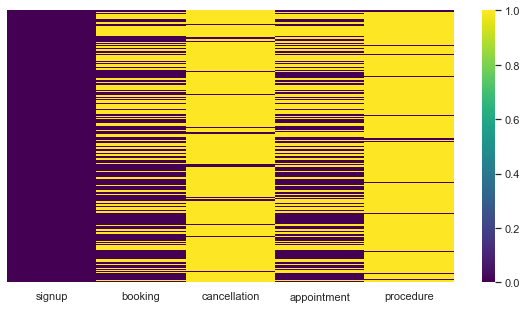

In [63]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(df_dates.isna(),cmap='viridis', yticklabels=False)
plt.show()

Reshaping the dataframe to enable timeseries visualisation.

In [64]:
df_melt = pd.melt(df_dates,
                   value_vars=['signup', 'booking', 'cancellation', 'appointment', 'procedure'],
                   var_name='Event',value_name='Dates')
df1_melt = df_melt.dropna()
df1_melt.head()

,Event,Dates
0,signup,2019-12-20
1,signup,2019-12-23
2,signup,2019-12-19
3,signup,2019-12-22
4,signup,2019-12-23


Saving a copy of the new dataframe because I was not able to find a boxplot that whould take categorical data in Python, but I found one in Excel.

In [66]:
df1_melt.to_csv('melted.csv')

In [67]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

The graph I did find in Python is the below showing events at the point in time.

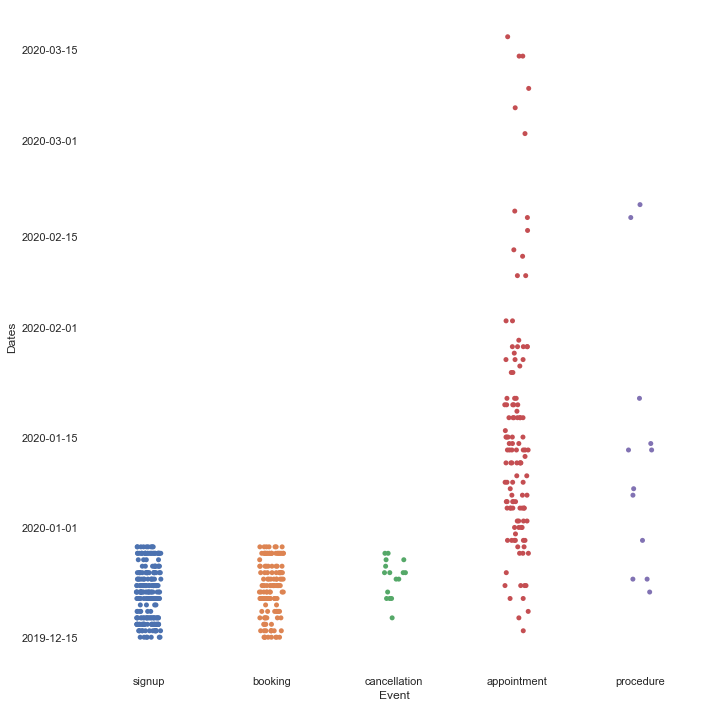

In [70]:
sns.catplot(data=df1_melt, x="Event", y="Dates", size=10)